## Import main functions

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/l4_dataset')

In [1]:
import numpy as np

import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model, Sequential

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imw = 192
imh = 192
c = 3
RS = 2211

In [0]:
encoder = load_model("/content/gdrive/My Drive/l4_dataset/encoder.h5")

## Read data

In [0]:
npzfile = np.load('/content/gdrive/My Drive/l4_dataset/CK19_full.npz')

In [0]:
metrics = np.load('/content/gdrive/My Drive/l4_dataset/CK19_overlaps.npz')

In [0]:
X = npzfile['x']
filenames = npzfile['y']

In [0]:
y_overlaps = metrics['overlaps']

In [0]:
x_combined, y_combined = combine_images(X, filenames, mask=False)

Images preprocessed. Size of dataset: 29400


In [0]:
X = None

In [0]:
efficient_shuffle(x_combined, y_combined, y_overlaps, random_state=RS)

## Label classifier (unstimulated, ova, cona, faulty)

```python
classifier = Sequential()
classifier.add(encoder)
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(4, activation='softmax'))
```

In [0]:
x_train, x_test, y_train, y_test = x_combined[:-1000], x_combined[-1000:], y_combined[:-1000], y_combined[-1000:]

In [0]:
y_train_c = tensorflow.keras.utils.to_categorical(y_train, 4)

In [0]:
y_test_c = tensorflow.keras.utils.to_categorical(y_test, 4)

In [0]:
history = classifier.fit(x_train, y_train_c,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_split=0.15)

Train on 23460 samples, validate on 4140 samples
Epoch 1/10
23460/23460 [==============================] - 45s 2ms/sample - loss: 0.9583 - acc: 0.5219 - val_loss: 0.9563 - val_acc: 0.5435
Epoch 2/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.8078 - acc: 0.6246 - val_loss: 0.8666 - val_acc: 0.5966
Epoch 3/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.7386 - acc: 0.6659 - val_loss: 0.9142 - val_acc: 0.5865
Epoch 4/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.6689 - acc: 0.7057 - val_loss: 0.9046 - val_acc: 0.5937
Epoch 5/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.6012 - acc: 0.7447 - val_loss: 0.9511 - val_acc: 0.5845
Epoch 6/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.4663 - acc: 0.8087 - val_loss: 1.0370 - val_acc: 0.5906
Epoch 7/10
23460/23460 [==============================] - 42s 2ms/sample - loss: 0.3313 - acc: 0.8766 - val_loss: 1.2

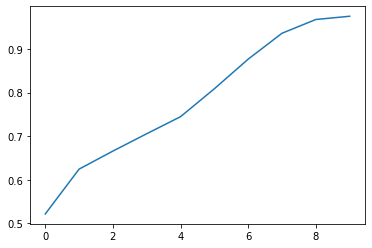

In [0]:
plt.plot(history.history['acc'])

In [0]:
score1 = classifier.evaluate(x_test, y_test_c, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 2.2097943849563597
Test accuracy: 0.528


In [0]:
y_pred = np.argmax(classifier.predict(x_test), axis=1)

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

names = ["Unstimulated", "OVA", "ConA", "Faulty"]

def plot_confusion_matrix(predictions, labels):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(labels, predictions)
    ax = sn.heatmap(cm, fmt="d", annot=True, cmap="Greens", cbar_kws={'label': 'Number of predictions'}, 
             xticklabels=names, yticklabels=names)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

In [0]:
np.sum(y_test[y_test==1])

21.0

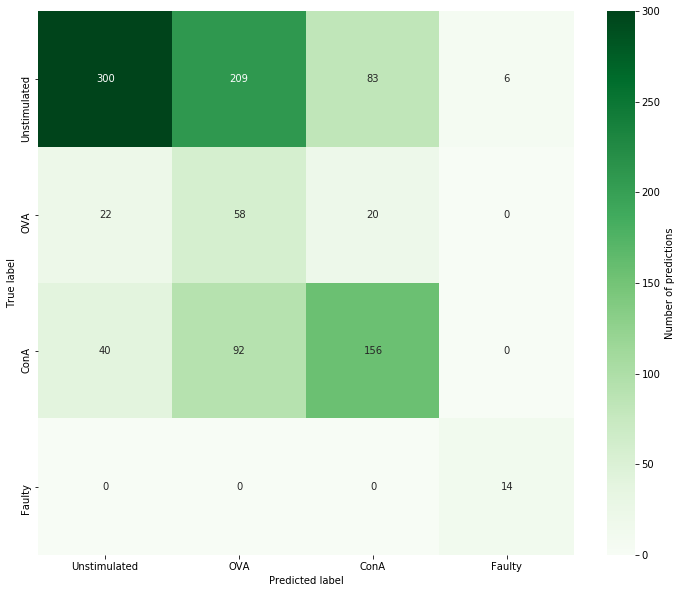

In [0]:
plot_confusion_matrix(y_pred, y_test)